#  CHURN OR NOT ?

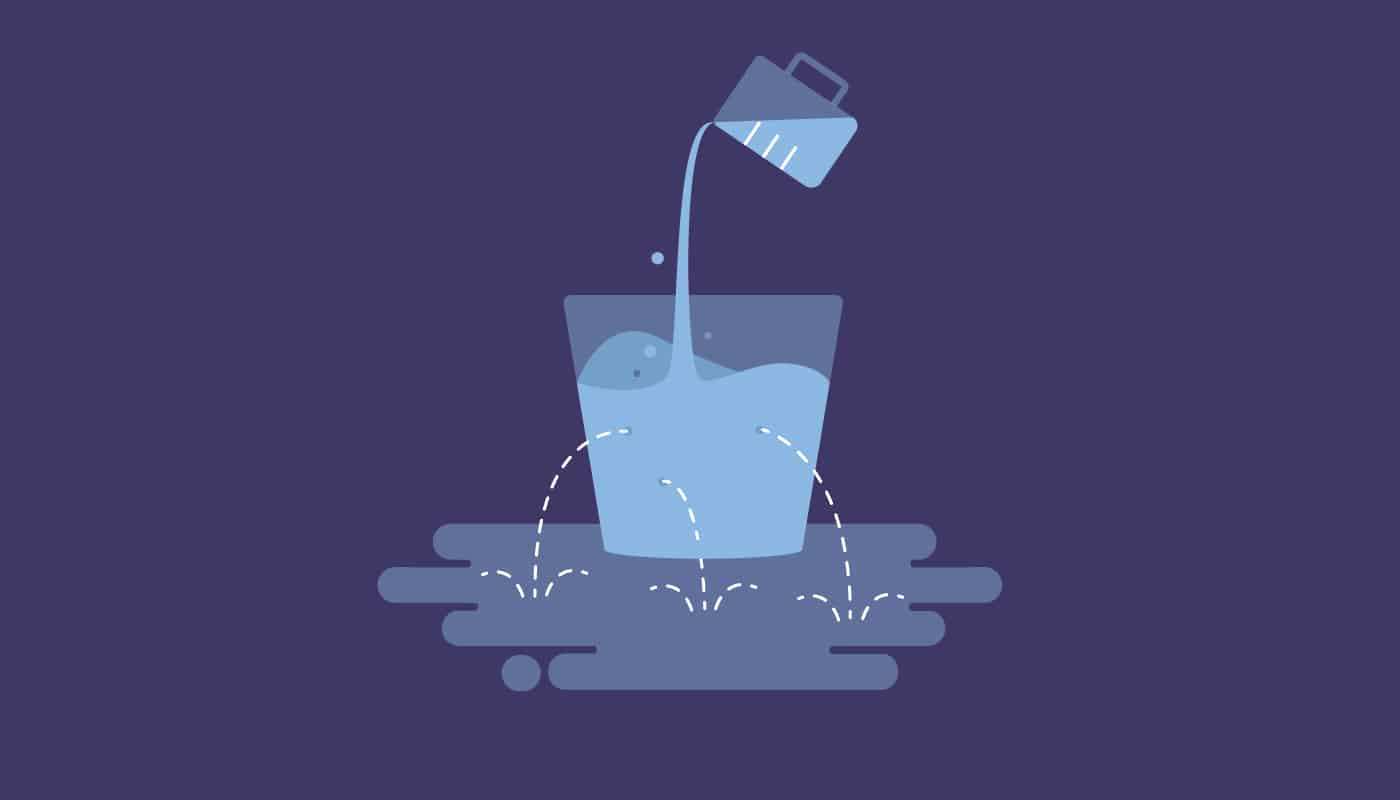

# **Problem:
Can you devolop a machine learning model that can predict the customers leaving the company?

* The aim of this project  to predict situation a bank's customers leave the bank or not..
* 
* The action that defines customer abandonment is the customer's bank account closure...

**Data Set Story:
**
It consists of 10000 observations and 12 variables.
Independent variables contain information about customers.
Dependent variable expresses customer abandonment.
Variables:

* Surname : Customer's Surname
* CreditScore : Customer's credit score
* Geography : Country
* Gender : (Female/Male)
* Age : Customer's Age
* Tenure : How many years of customer.
* Balance : Customer's balance
* NumOfProducts : Number of bank products are used
* HasCrCard : Credit card status (0=No,1=Yes)
* IsActiveMember : Active membership status (0=No,1=Yes)
* EstimatedSalary : Customers estimated salary
* Exited : Churn or not? (0=No,1=Yes)****


 # Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
import plotly.express as px
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

## Reading Data

In [2]:
df = pd.read_csv(r"../input/churndata/churn.csv" )


## Data Understanding

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
def info_(dataframe):
    print("shape:",dataframe.shape)
    print(dataframe.info())
    print("Index:",dataframe.index)
    print("Columns:",dataframe.columns)
    print("ANY_NAN:",dataframe.isnull().values.any())

In [5]:
info_(df)

shape: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
Index: RangeIndex(start=0, stop=10000, step=1)
Columns: Index(['RowNum

Null value does not appear.

In [6]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

Categorical and Numerical variables will be determined.

In [7]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10 
                and col not in "Exited" and col not in "CustomerId" ]

num_cols = [col for col in df.columns if df[col].nunique() > 10
                and df[col].dtypes != "O"
                and col not in "Exited" 
                and col not in cat_cols and col not in "CustomerId" and col not in "RowNumber"]

other_cols = [col for col in df.columns if col not in cat_cols 
                  and col not in num_cols and col not in "CustomerId"
                 and col not in "Exited"]

In [8]:
print("Categorical Variables : " , cat_cols)
print("Numerical Variables : " , num_cols)
print("Other Variables : " , other_cols)

Categorical Variables :  ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Numerical Variables :  ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
Other Variables :  ['RowNumber', 'Surname']


In [9]:
for col in cat_cols :
    print ("Categorical variables feature : " , col, "\n" )
    print( df[col].value_counts())

Categorical variables feature :  Geography 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Categorical variables feature :  Gender 

Male      5457
Female    4543
Name: Gender, dtype: int64
Categorical variables feature :  NumOfProducts 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
Categorical variables feature :  HasCrCard 

1    7055
0    2945
Name: HasCrCard, dtype: int64
Categorical variables feature :  IsActiveMember 

1    5151
0    4849
Name: IsActiveMember, dtype: int64


* Let's examine our target variable "Exited" for this data.

In [10]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [11]:
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [12]:
has_outliers(df , num_cols )

[]

In [13]:
def target(dataframe, target):
    f, ax = plt.subplots(1, 2, figsize=(18, 8))
    df[target].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
    ax[0].set_title(target + ' Distribution')
    ax[0].set_ylabel('')
    sns.countplot(target, data=df, ax=ax[1])
    ax[1].set_title(target + " Count Plot")
    plt.show()

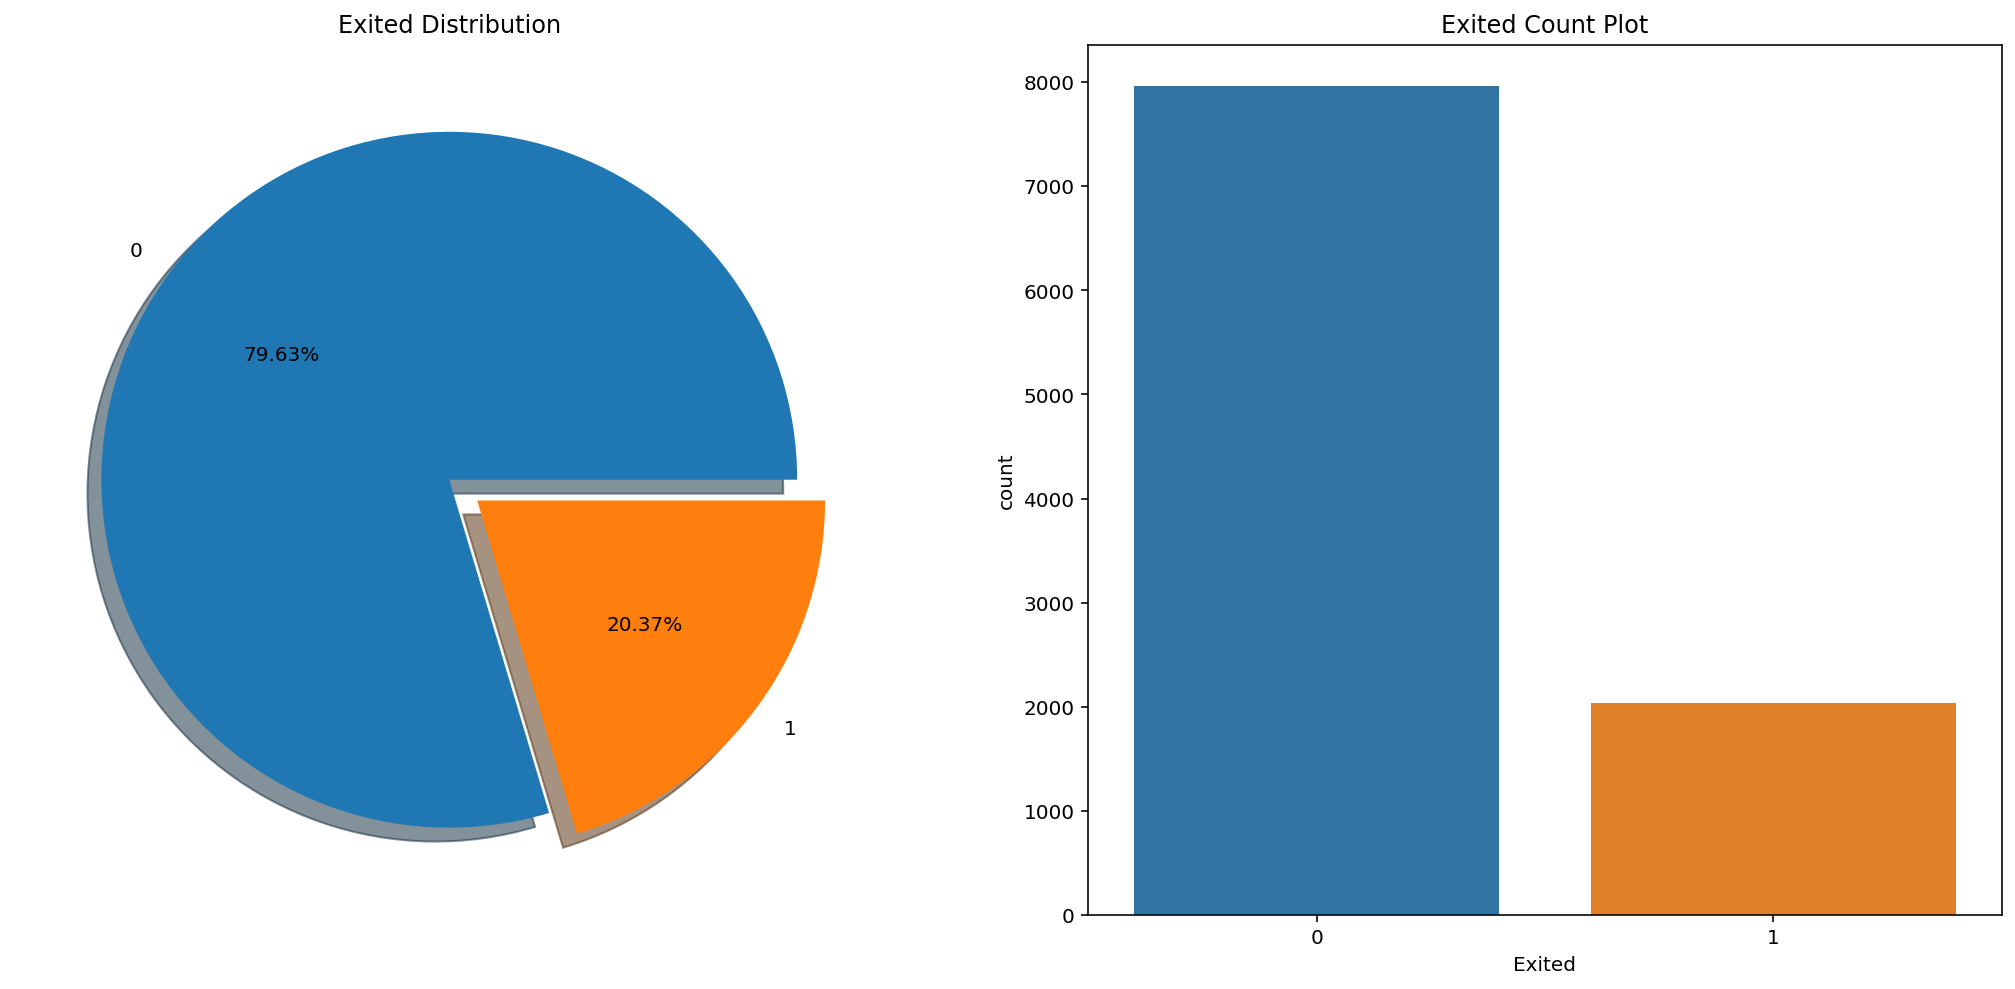

In [14]:
target(df , "Exited")

* We saw that the * Exited variable is distributed as 80 '20. Generally, it is common to see imbalanced data in Churn and Fraud datasets.

# # Correlation between variables

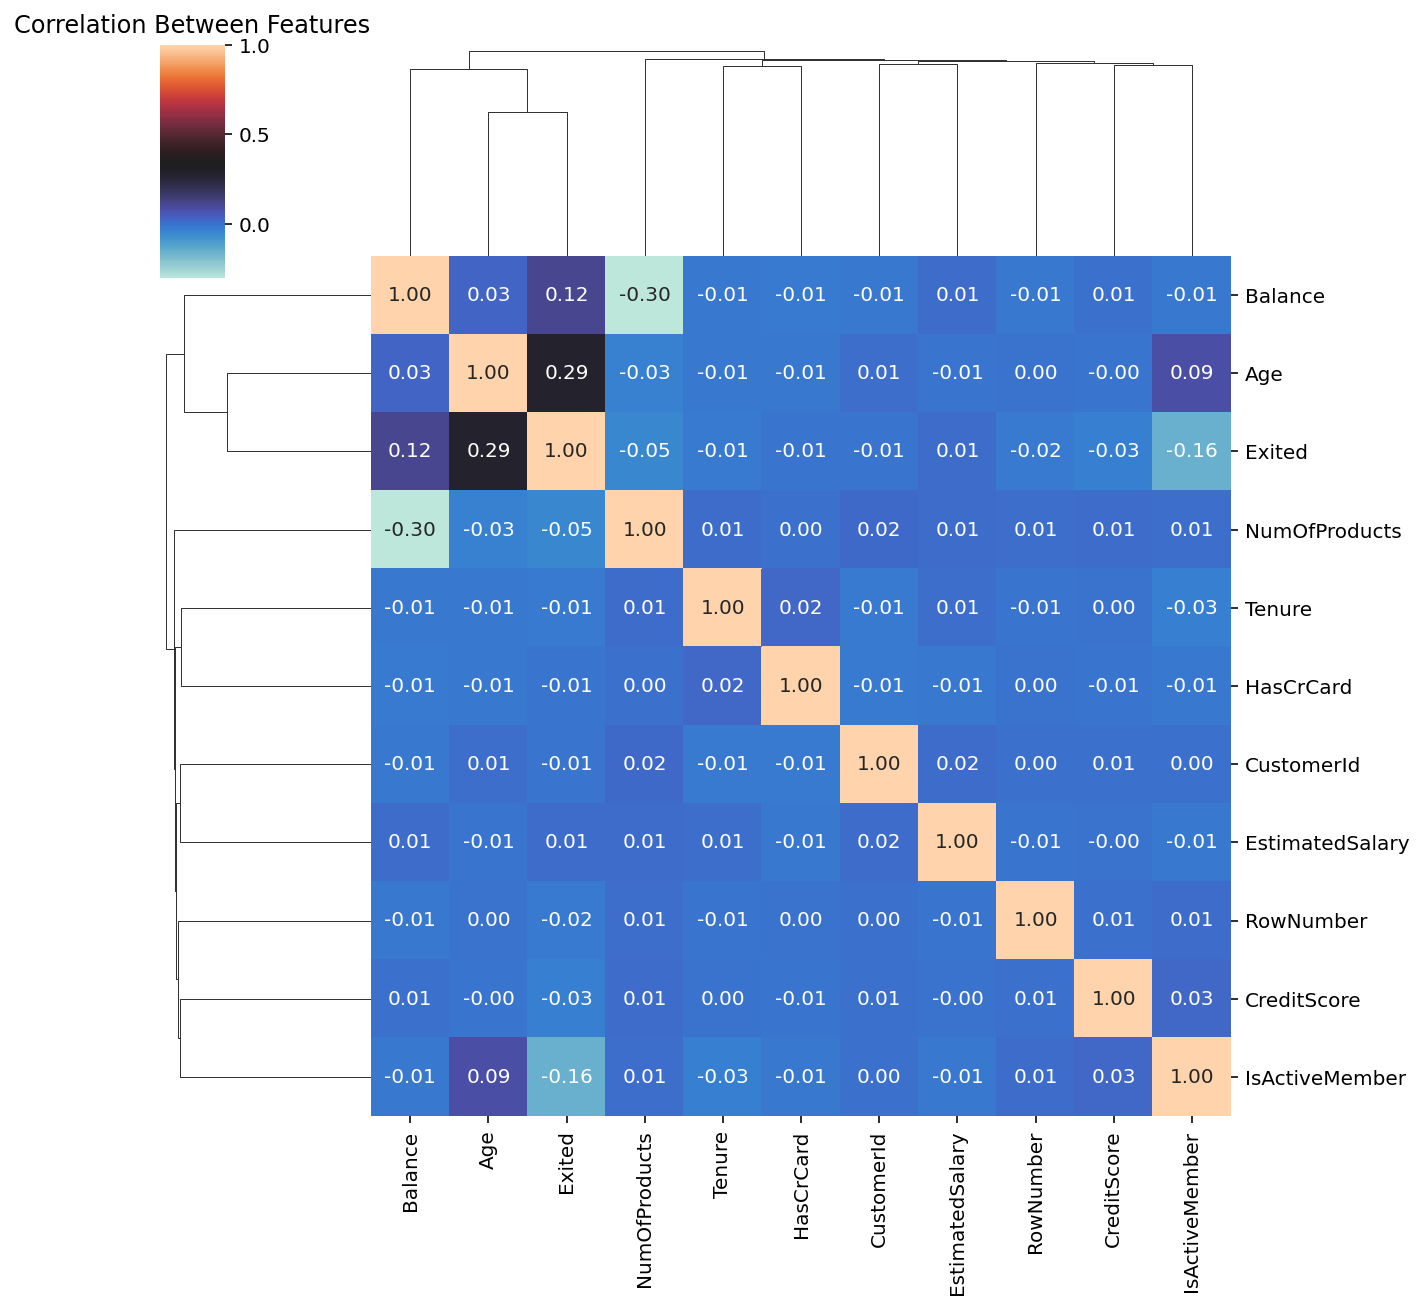

In [15]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", cmap = "icefire", figsize=(9,9))
plt.title("Correlation Between Features")
plt.show()

# Numerical Variable Analysis

In [16]:
df[num_cols].describe([0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,489.0000,521.00,584.00,652.000,718.0000,778.000,812.0000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,25.0000,27.00,32.00,37.000,44.0000,53.000,60.0000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,1.0000,1.00,3.00,5.000,7.0000,9.000,9.0000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.00,0.00,97198.540,127644.2400,149244.792,162711.6690,185967.9854,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,9851.8185,20273.58,51002.11,100193.915,149388.2475,179674.704,190155.3755,198069.7345,199992.48


* CreditScore : Average and median values are overlap and  normal distribution can be observed.
* Age: Average age and median values seem close to each other besides, the maximum value is observed as 92..
* Tenure: Average mean and median values almost same. 
* Balance: Average value higher than median value.
* EstimatedSalary : Average and median values are considered the same. outlier status not observed.

In [17]:
def hist_of_num(data):
    num_cols = [col for col in data.columns if data[col].dtypes != "O" and col not in "CustomerId" and col not in "Exited" ]
    counting_col = 0
    for col in num_cols:
        data[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        counting_col += 1
        
    

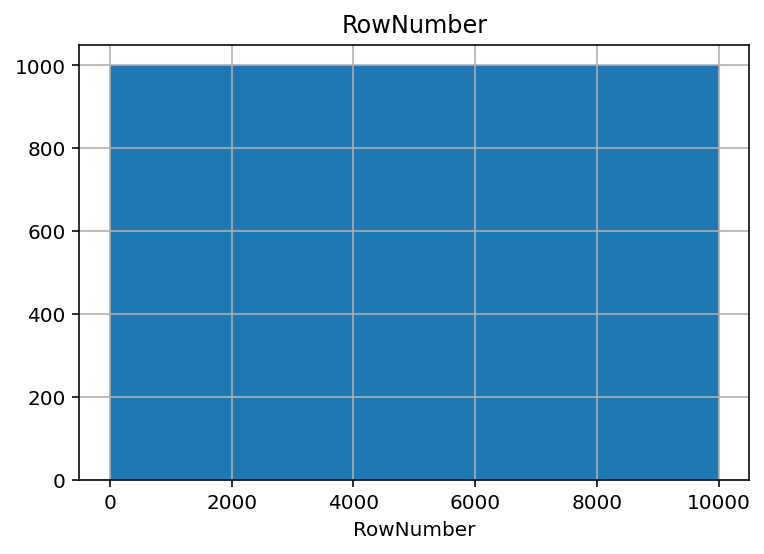

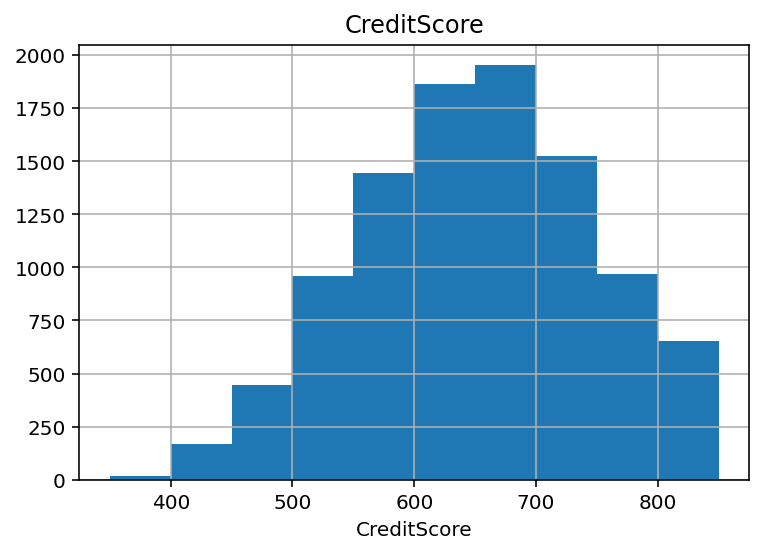

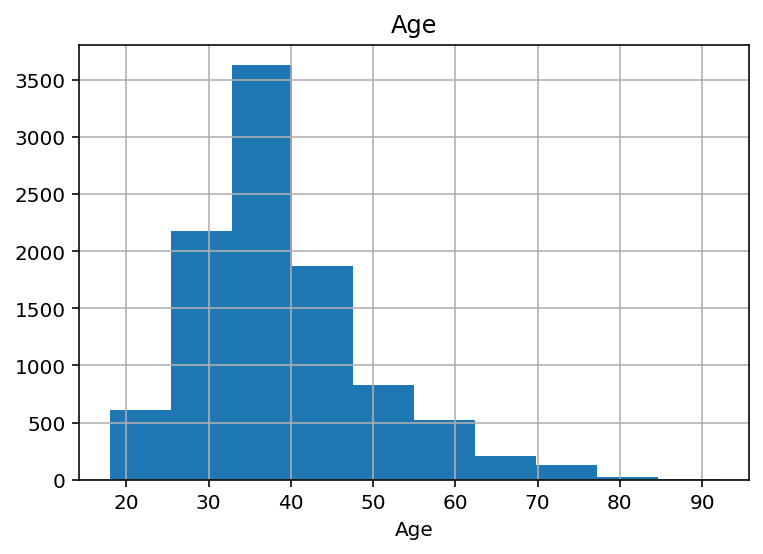

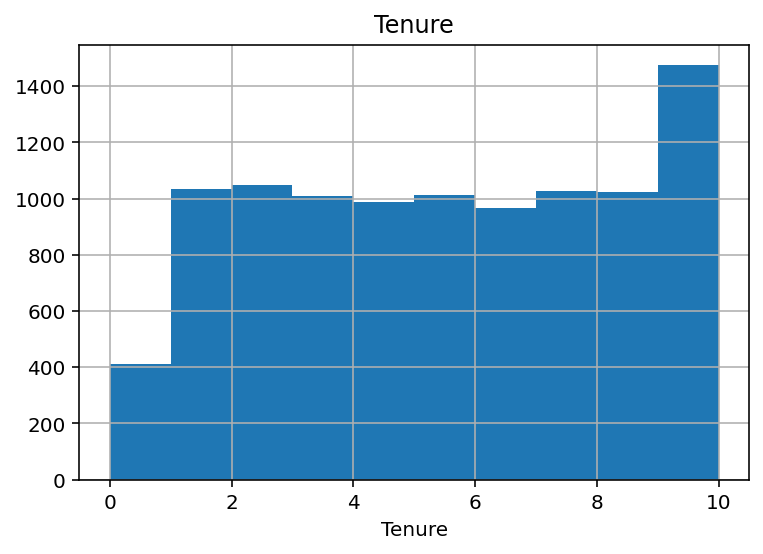

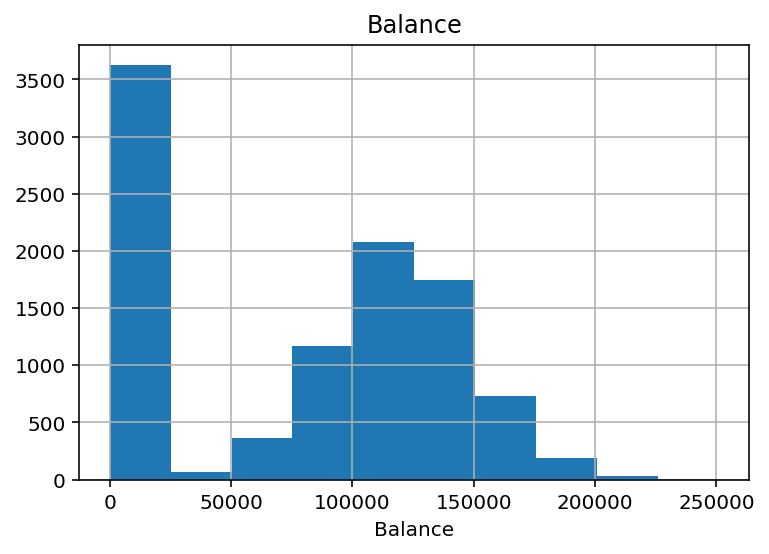

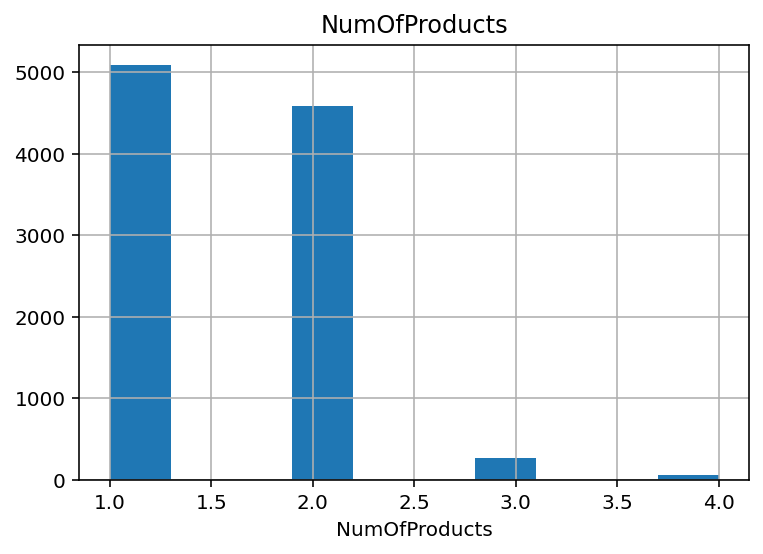

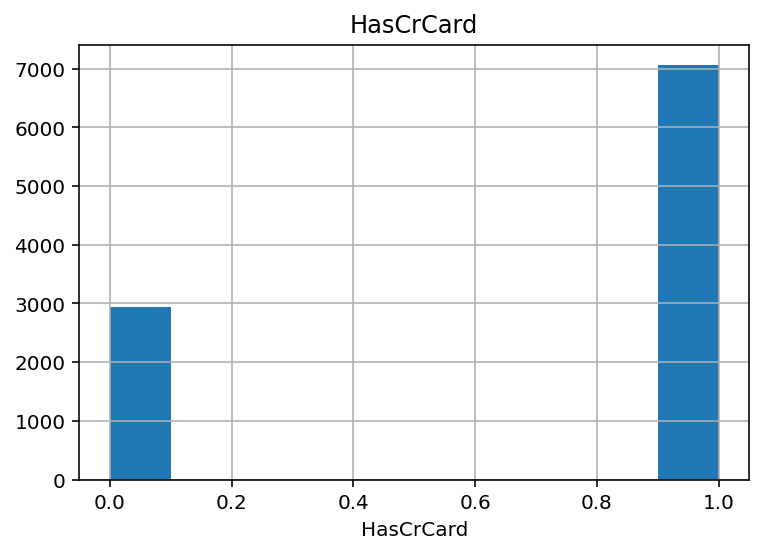

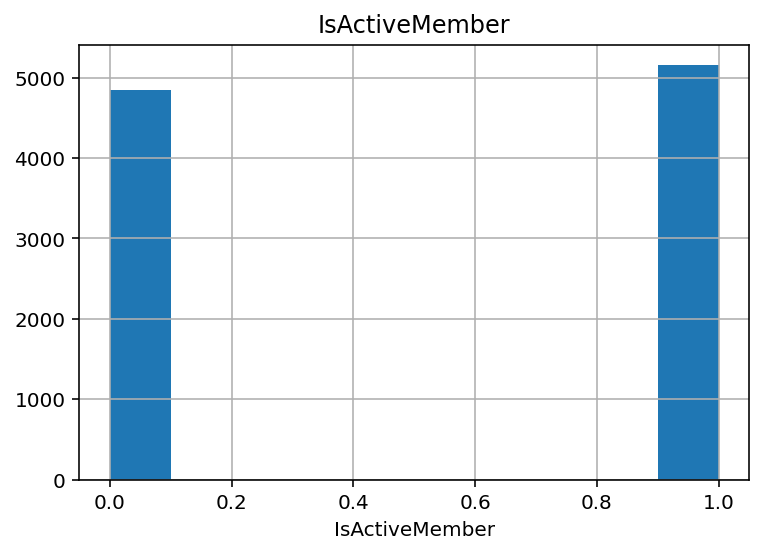

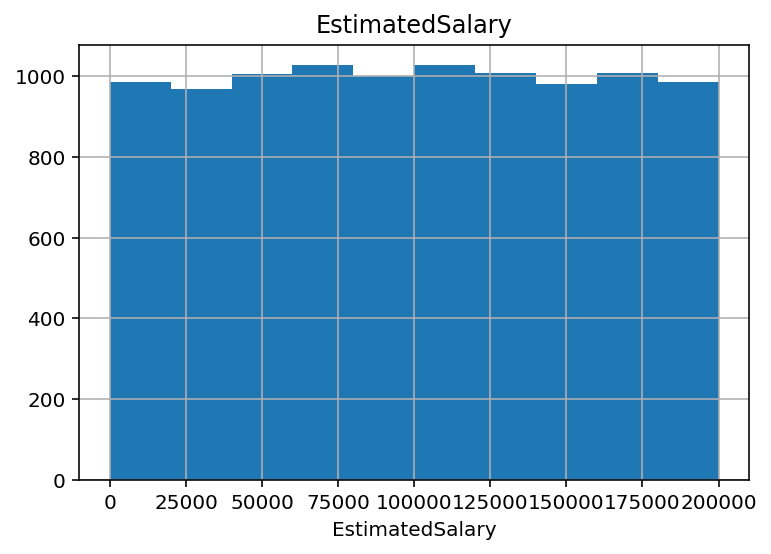

In [18]:
hist_of_num(df)

In [19]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

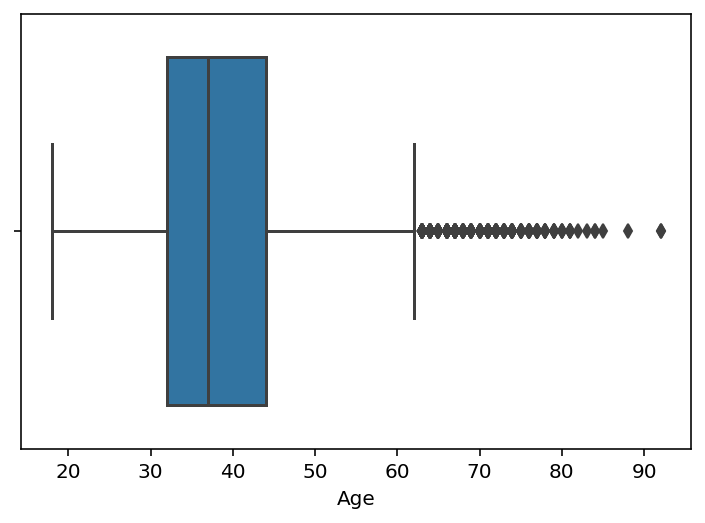

In [20]:
sns.boxplot(x=df["Age"]);

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [21]:
df[(df["Age"] < low) | (df["Age"] > up)][["Age"]].shape[0]


359

In [22]:
df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)

True

In [23]:
def pxfornum (dataframe):
    for col in dataframe[num_cols]:
        fig = px.histogram(
        df, x=col, color='Exited',
        marginal='box', nbins=50,
        color_discrete_map={0: '#D62728', 1: '#3366CC'},
        barmode='overlay')
        fig.update_layout(height=600, width=800, 
        title_text='Credit Score Feature')
        fig.show()

In [24]:
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [25]:
pxfornum(df)

* None of the customers with a balance value of "0" churn.

In [26]:
def graphs(dataframe, col, target, cat_analyze=True):
    if cat_analyze == True:
        fig, axarr = plt.subplots(1, 2, figsize=(10, 6))
        a = sns.countplot(x=dataframe[col], hue=dataframe[target], data=dataframe, ax=axarr[0]).set_title(
            'Count by class')
        axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=75);
        axarr[1].set_title('Rate by class')
        b = sns.barplot(x=dataframe[col], y=dataframe[target], data=dataframe, ax=axarr[1]).set_ylabel('Rate')
        axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=75);
        plt.show()
    else:
        fig, axarr = plt.subplots(1, 3, figsize=(15, 6))
        axarr[0].set_title('Distribution')
        f = sns.distplot(dataframe[col], color='g', bins=40, ax=axarr[0])
        axarr[1].set_title('Distribution for the two subpopulations')
        g = sns.kdeplot(dataframe[col].loc[dataframe[target] == 1],
                        shade=True, ax=axarr[1], label='Risk').set_xlabel(col)
        g = sns.kdeplot(dataframe[col].loc[dataframe[target] == 0],
                        shade=True, ax=axarr[1], label='Good', legend=True)
        axarr[2].set_title('Outlier')
        m = sns.boxplot(x=col, data=dataframe)
        plt.legend();

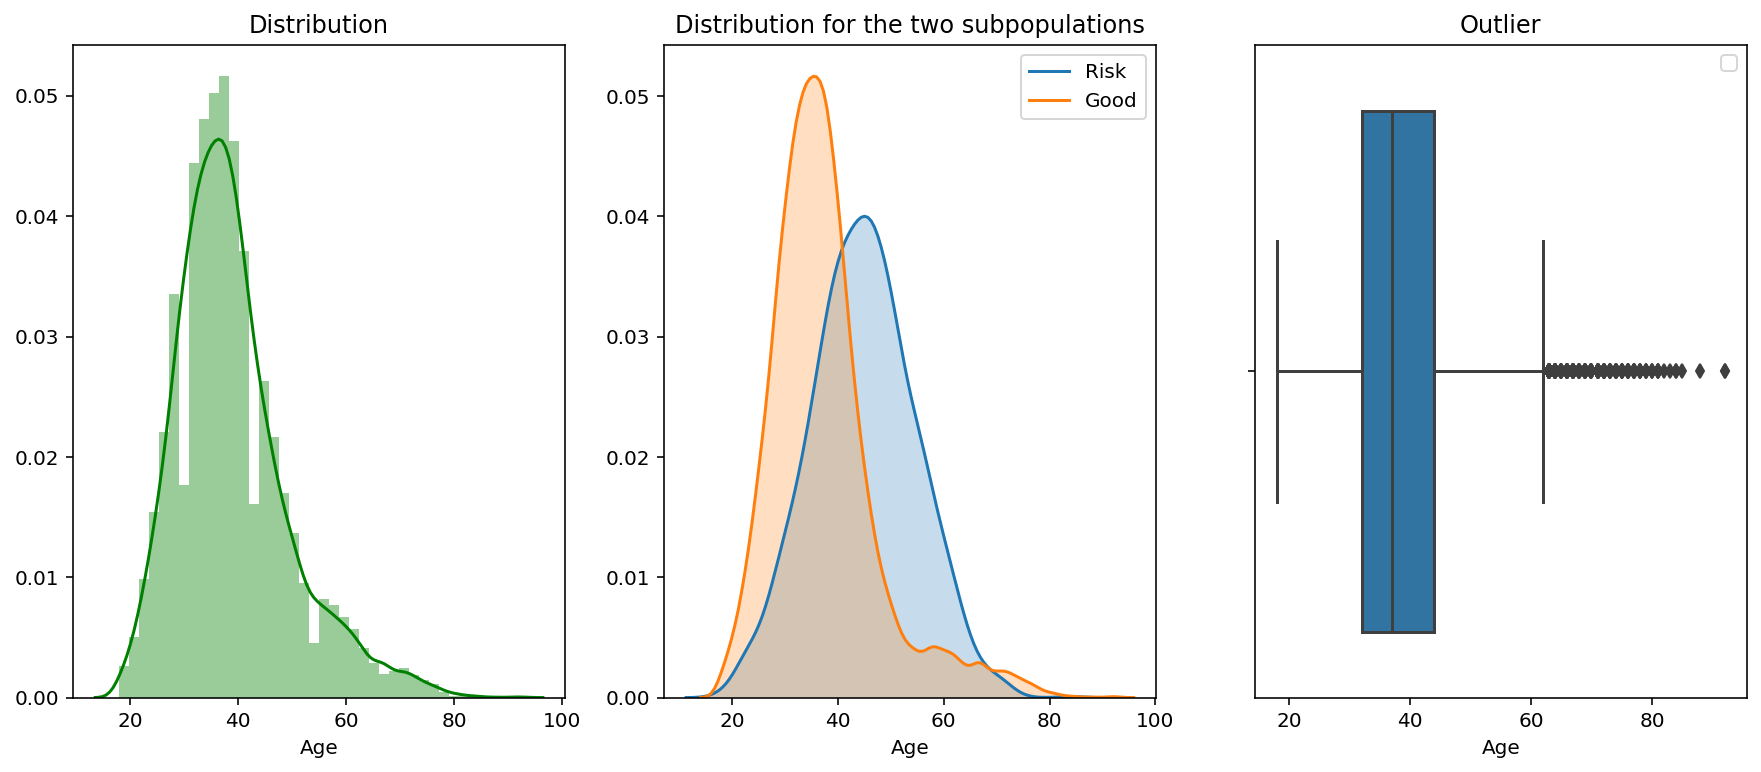

In [27]:
graphs(df , "Age" , "Exited" , cat_analyze=False)

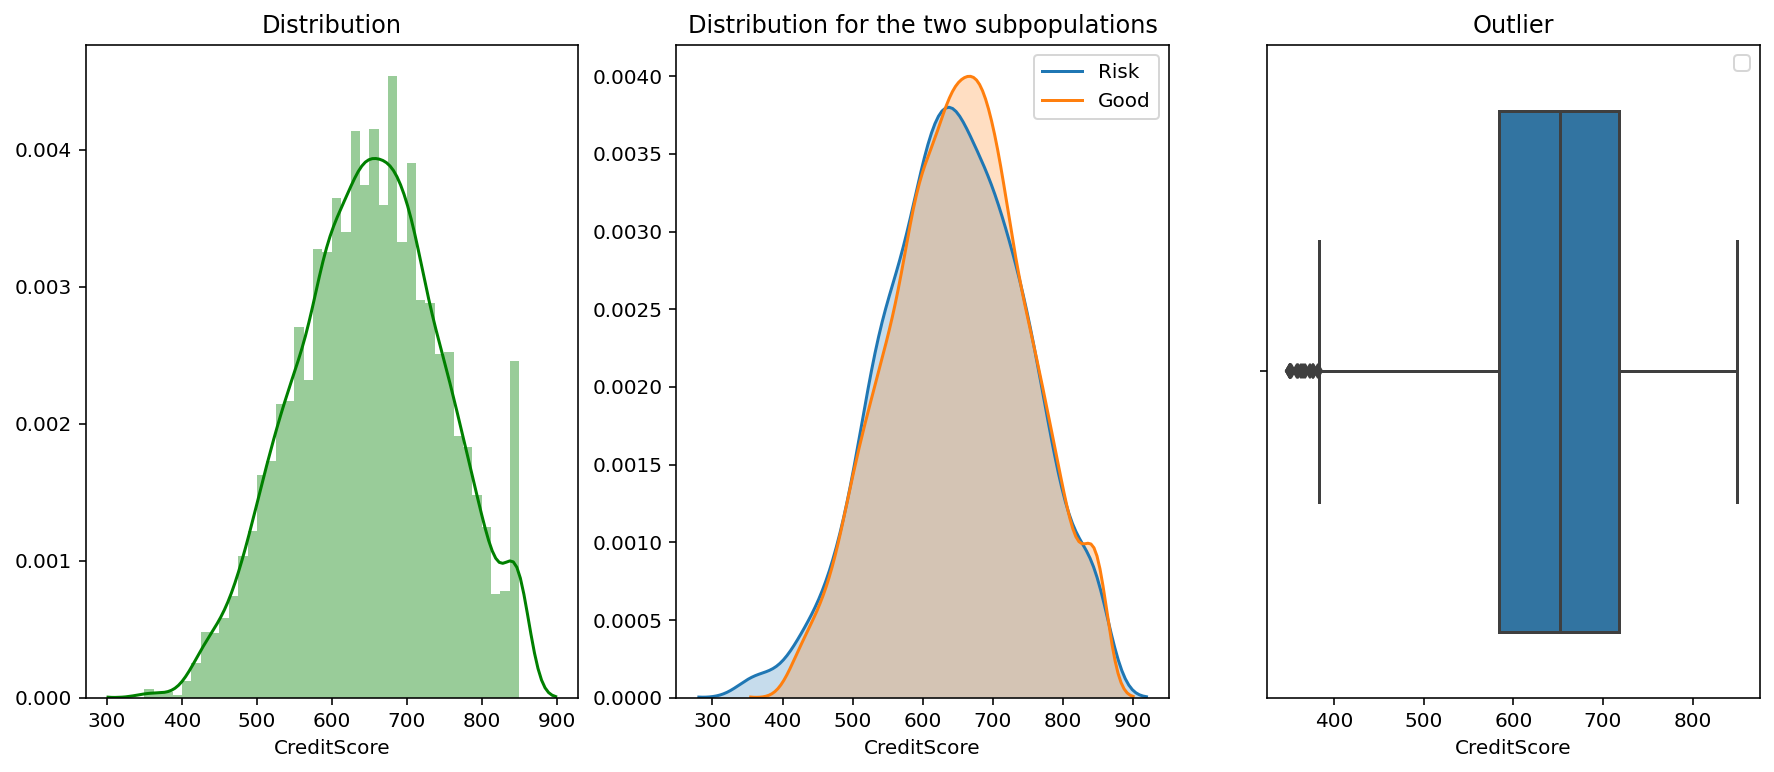

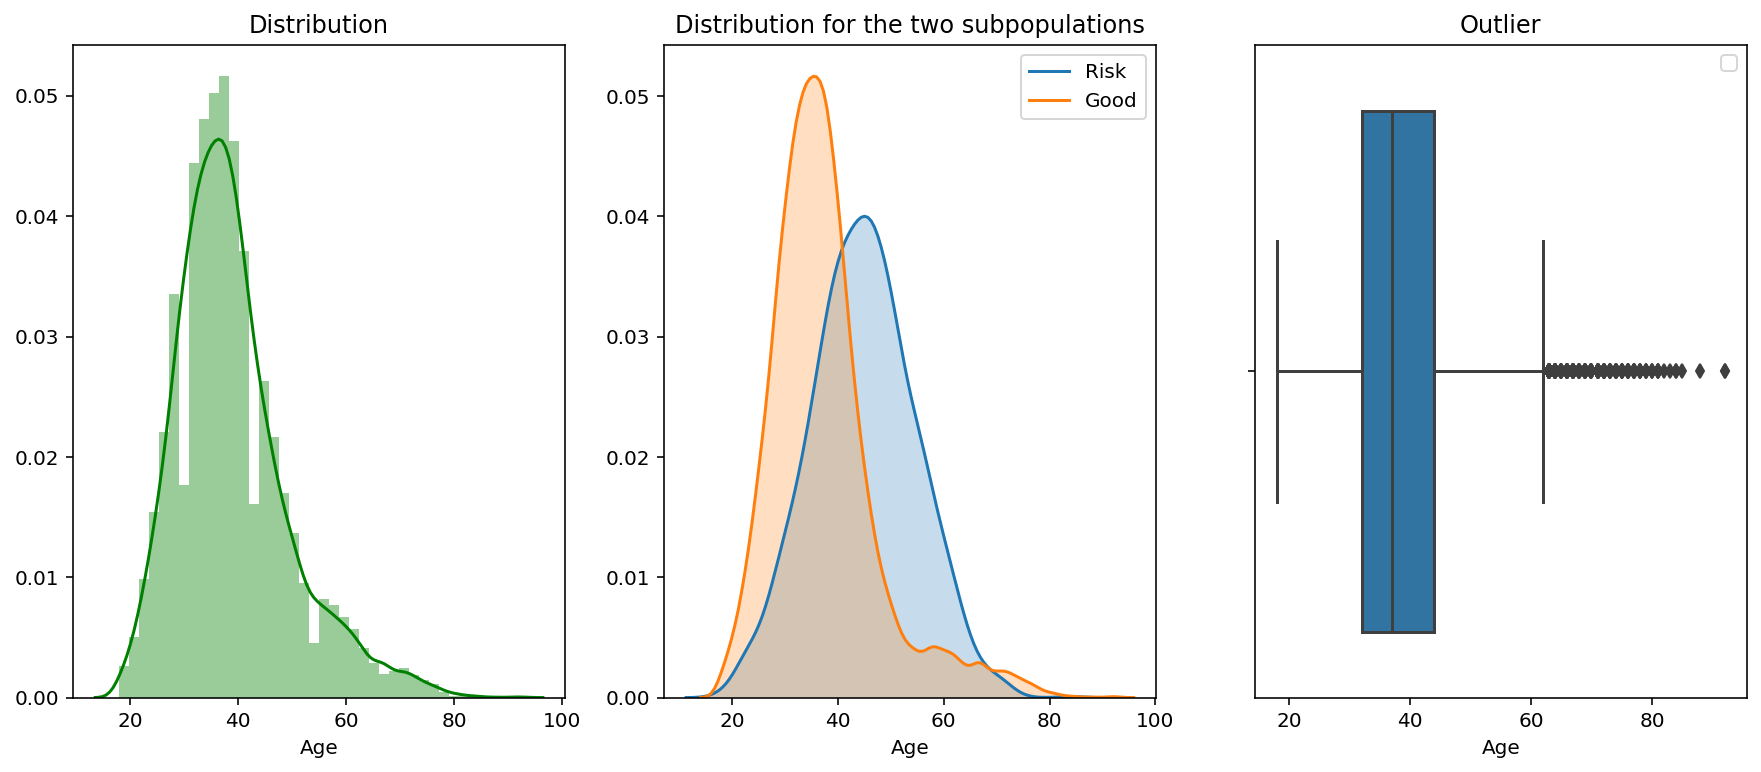

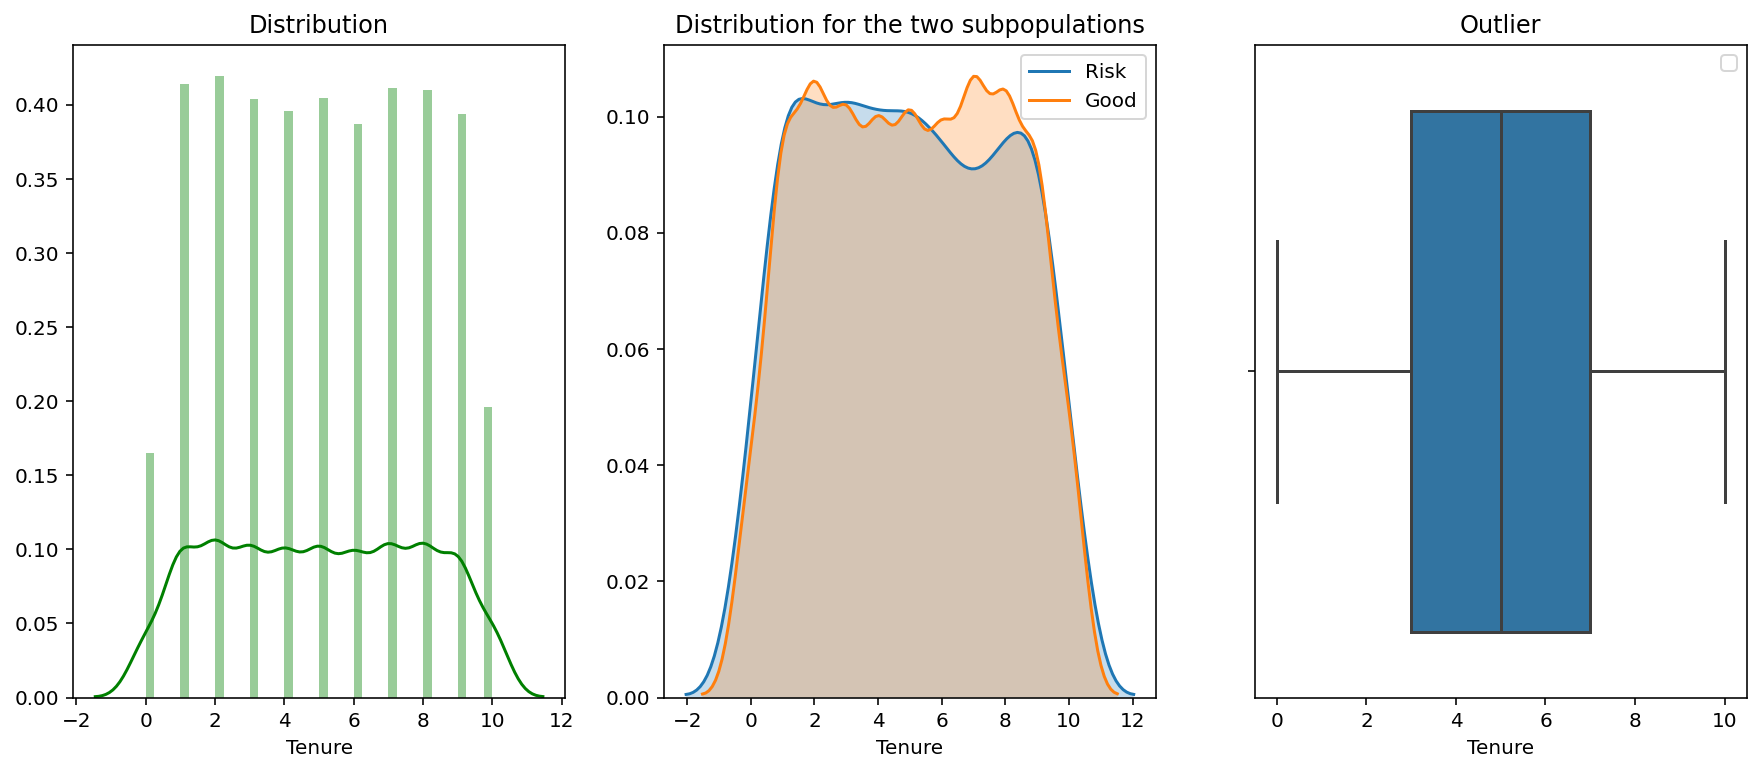

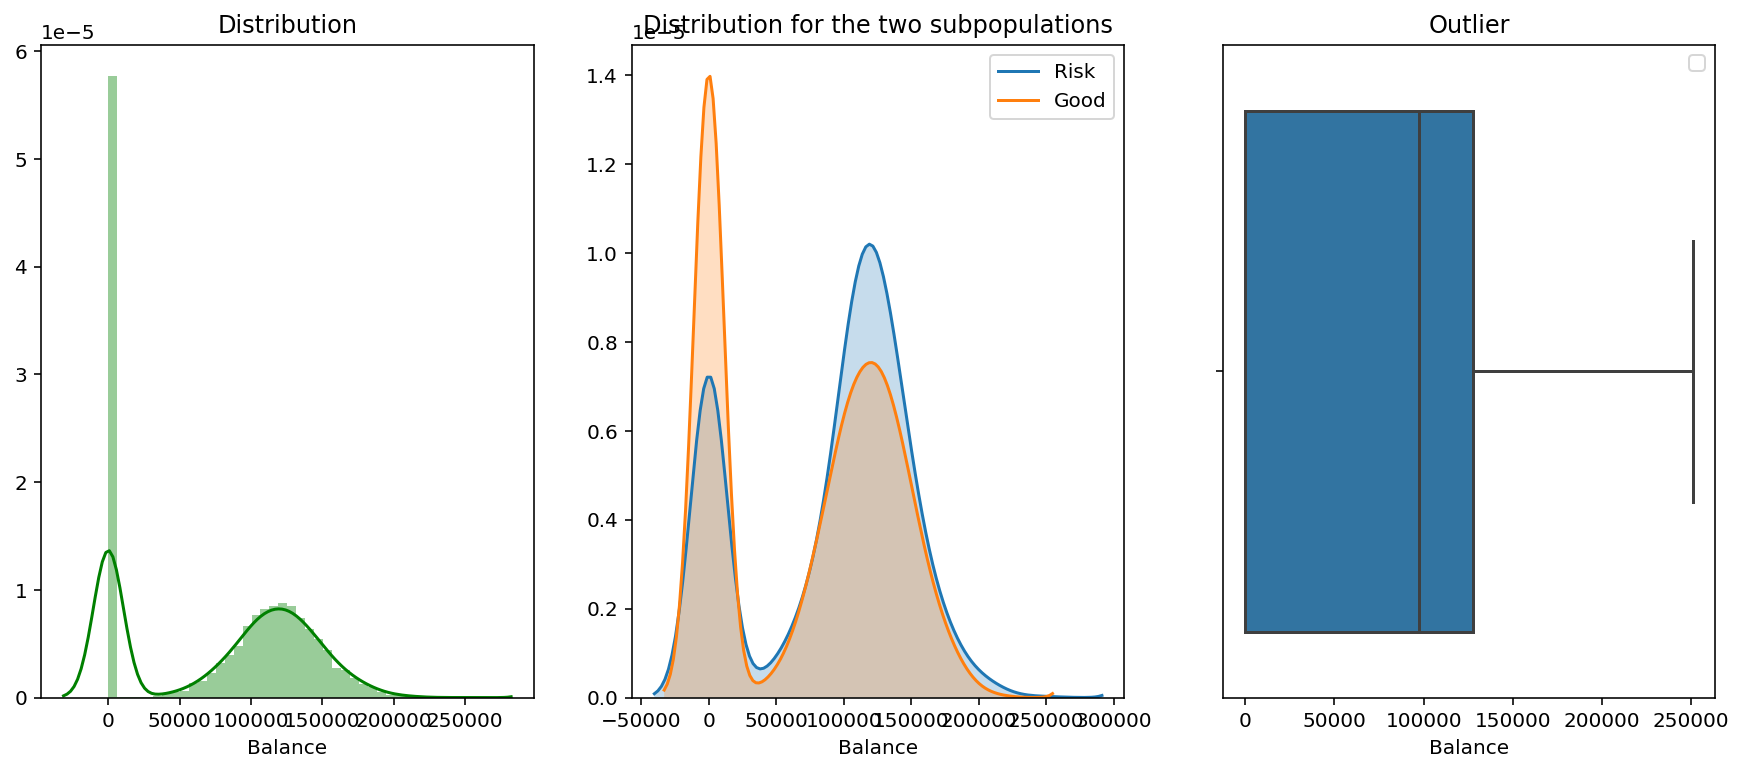

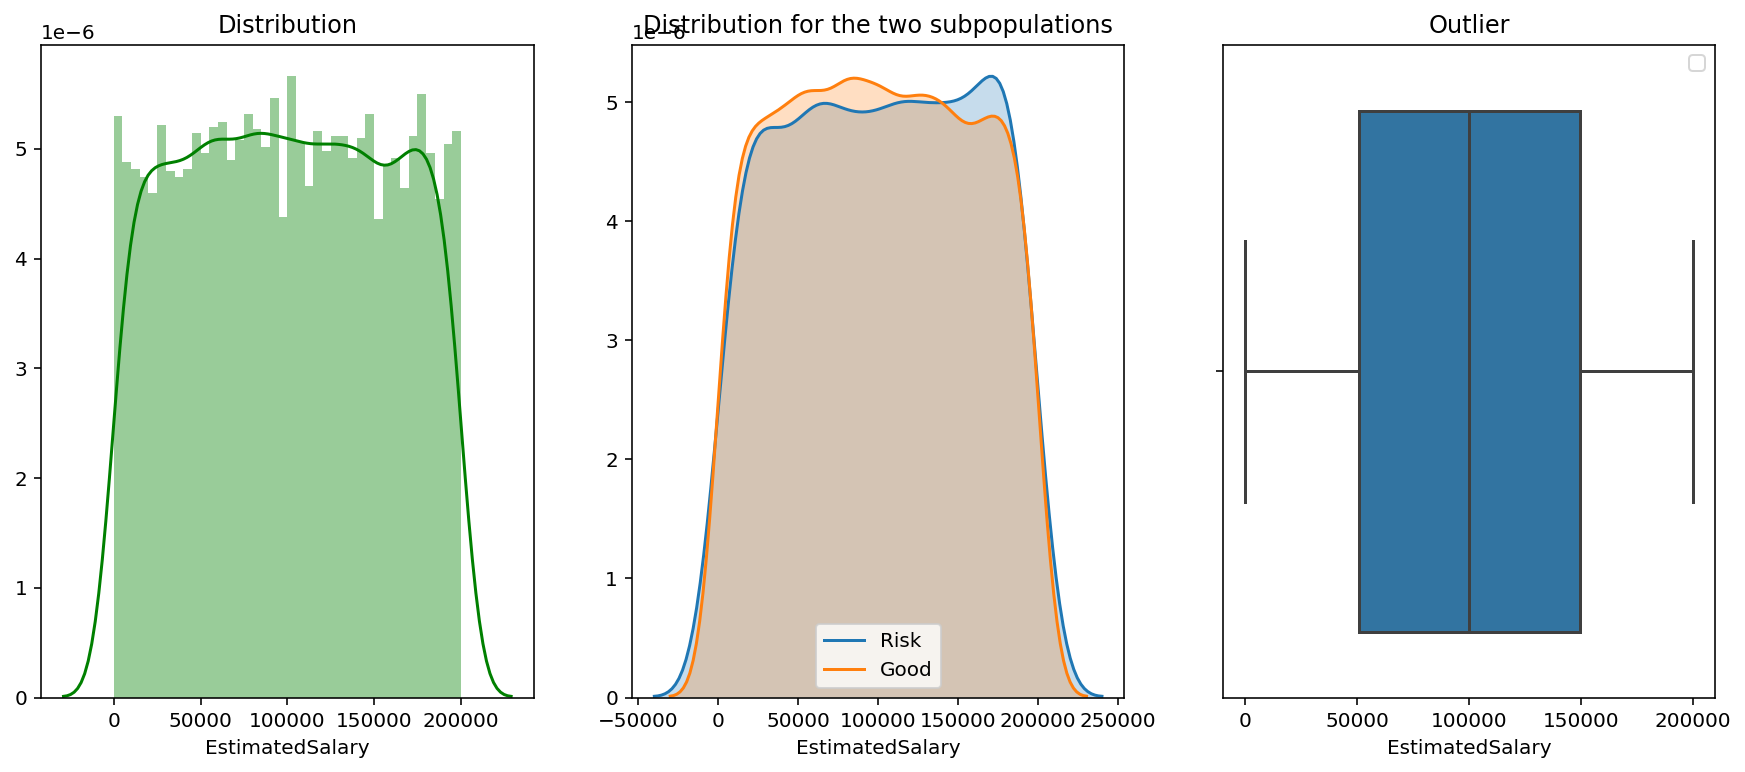

In [28]:
for col in num_cols :
    graphs(df,col , "Exited" , cat_analyze = False)

# **#Categorical Variable Analysis**

In [29]:
def stalk(dataframe, col, target, num_cols):
    print("{}  | type: {}\n".format(col, dataframe[col].dtype))
    print(pd.DataFrame({"n": dataframe[col].value_counts(),
                        "Ratio": 100 * dataframe[col].value_counts() / len(dataframe),
                        # "TARGET_MEDIAN": dataframe.groupby(col)[target].median(),
                        "Target_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
    graphs(dataframe, col, target)
    display(dataframe.groupby(col).agg({num_cols[0]: [np.mean],
                                        num_cols[1]: [np.mean],
                                        num_cols[2]: [np.mean],
                                        num_cols[3]: [np.mean, np.median],
                                        num_cols[4]: [np.mean],
                                        target: "mean"}))

Geography  | type: object

              n  Ratio  Target_MEAN
Geography                          
France     5014  50.14     0.161548
Germany    2509  25.09     0.324432
Spain      2477  24.77     0.166734




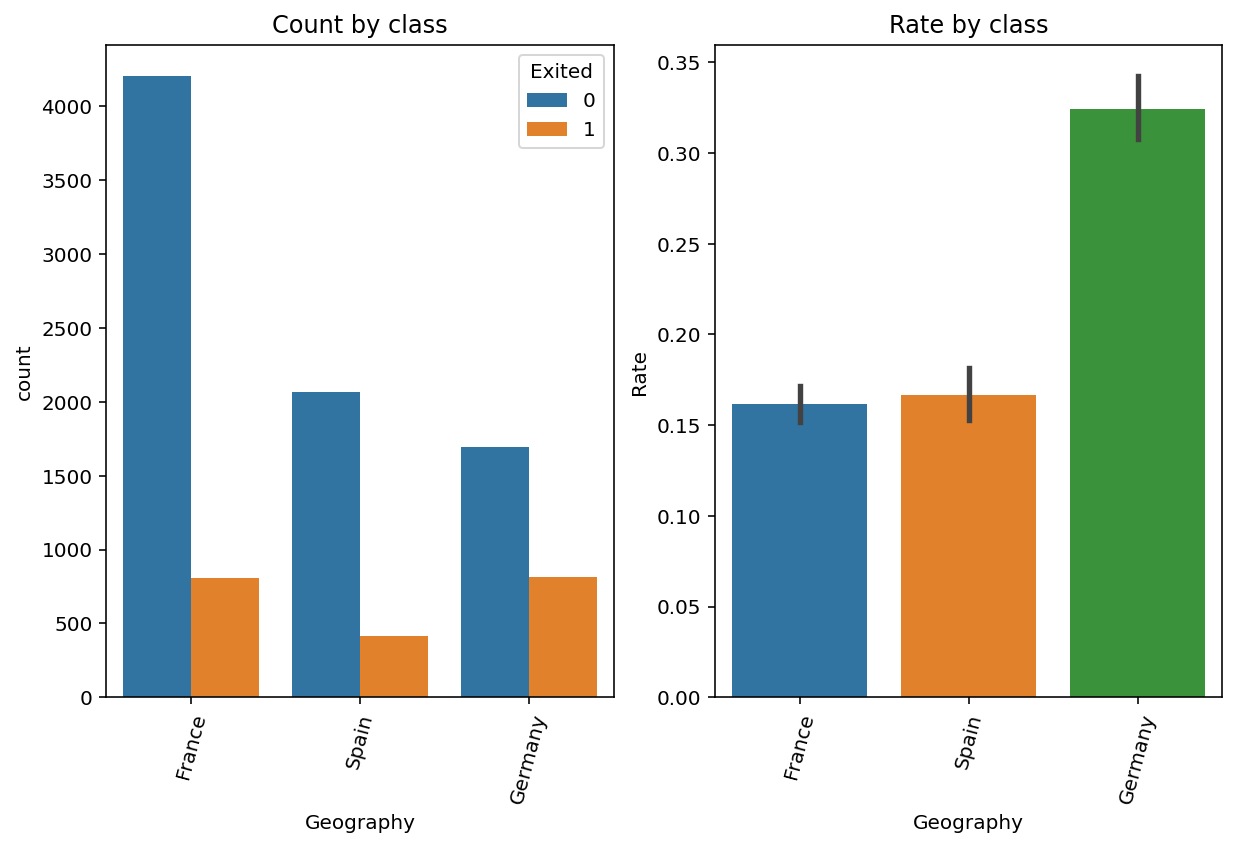

CreditScore        Age    Tenure        Balance             \
                 mean       mean      mean           mean     median   
Geography                                                              
France     649.668329  38.511767  5.004587   62092.636516   62153.50   
Germany    651.453567  39.771622  5.009964  119730.116134  119703.10   
Spain      651.333872  38.890997  5.032297   61818.147763   61710.44   

          EstimatedSalary    Exited  
                     mean      mean  
Geography                            
France       99899.180814  0.161548  
Germany     101113.435102  0.324432  
Spain        99440.572281  0.166734

In [30]:
stalk(df, "Geography" , "Exited" , num_cols)

*  CreditScore : The average values of the credit scores of the countries are very close to each other and France is a very low level behind other countries..
*  Age: The average age values of the countries are still very close to each other, Germany is seen to be slightly above.
*  Tenure: The values showing the average number of years of customers in countries are almost the same.
*  Balance: In the average balance values of the countries, France and Spain are seen to be close to each other, but almost twice as high as Germany.
*  EstimatedSalary : Average estimated salary values of the countries are close to each other, again, Germany is one step ahead of the other two countries.

  If we compare according to Churn situations : 
*      Germany ranks first with a value of 0.324432..
*      Spain ranks second with a value of 0.166734.
*      In the last row is France, which is very close to Spain, and the value of France is 0.161548. .

HasCrCard  | type: int64

      n  Ratio  Target_MEAN
0  2945  29.45     0.208149
1  7055  70.55     0.201843




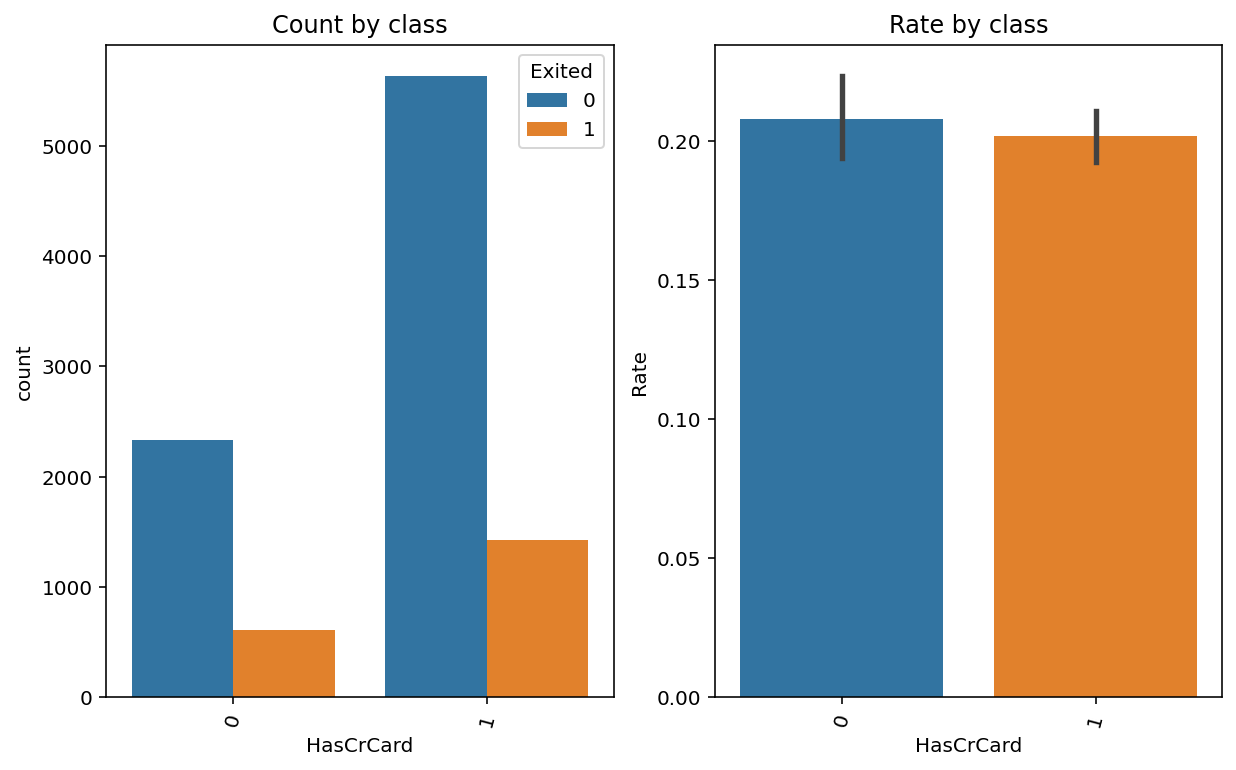

CreditScore        Age    Tenure       Balance            \
                 mean       mean      mean          mean    median   
HasCrCard                                                            
0          651.345331  39.112054  4.911715  77920.787552  97990.49   
1          650.187952  38.842381  5.054996  75886.913330  96877.21   

          EstimatedSalary    Exited  
                     mean      mean  
HasCrCard                            
0           100974.397711  0.208149  
1            99721.161949  0.201843

In [31]:
stalk(df,"HasCrCard", "Exited" , num_cols)

IsActiveMember  | type: int64

      n  Ratio  Target_MEAN
0  4849  48.49     0.268509
1  5151  51.51     0.142691




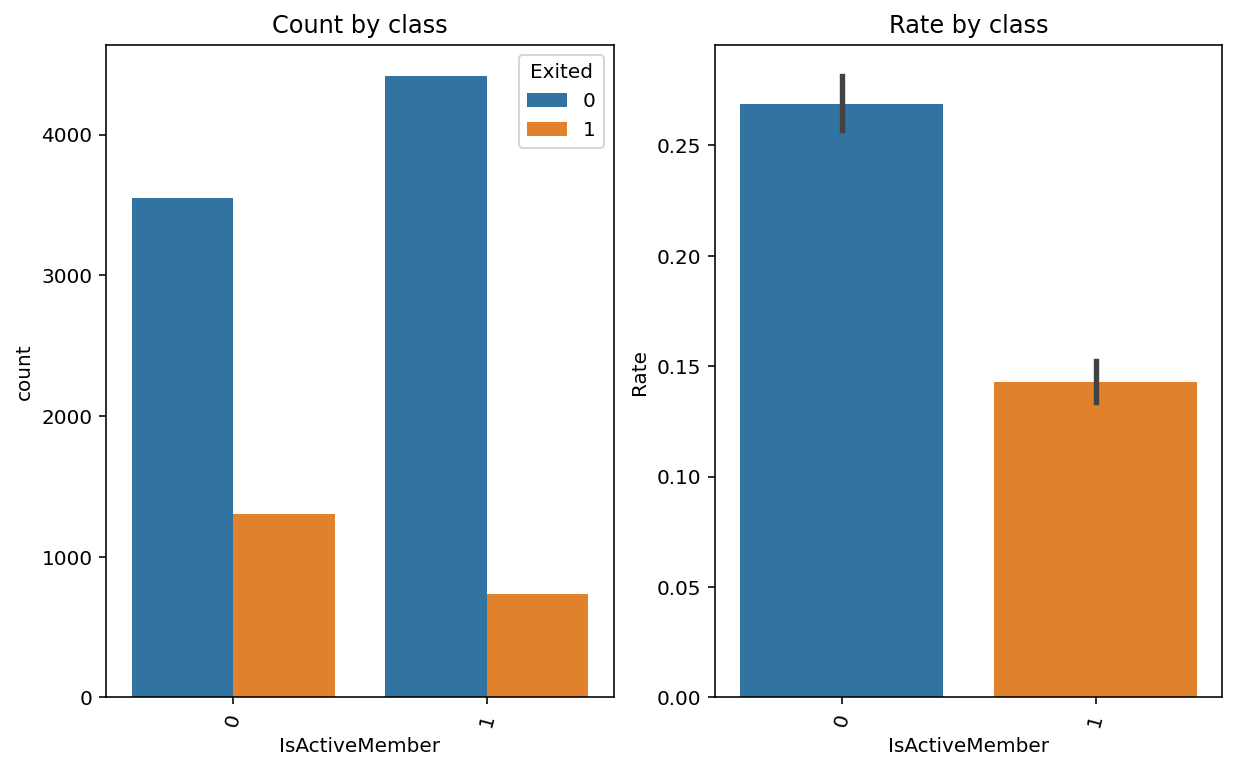

CreditScore        Age    Tenure       Balance            \
                      mean       mean      mean          mean    median   
IsActiveMember                                                            
0               647.973603  37.997938  5.097340  77134.376863  98263.46   
1               652.934188  39.791497  4.933217  75875.422145  96166.88   

               EstimatedSalary    Exited  
                          mean      mean  
IsActiveMember                            
0                100767.203854  0.268509  
1                 99452.965894  0.142691

In [32]:
stalk(df , "IsActiveMember", "Exited" , num_cols)

* 45% customers are inactive and have not exited from the organization. We can safely assume that these people either have forgotten about their account or else have kept their money in savings. The cause of concern is that 36% customers who were active in using the services have exited.

NumOfProducts  | type: int64

      n  Ratio  Target_MEAN
1  5084  50.84     0.277144
2  4590  45.90     0.075817
3   266   2.66     0.827068
4    60   0.60     1.000000




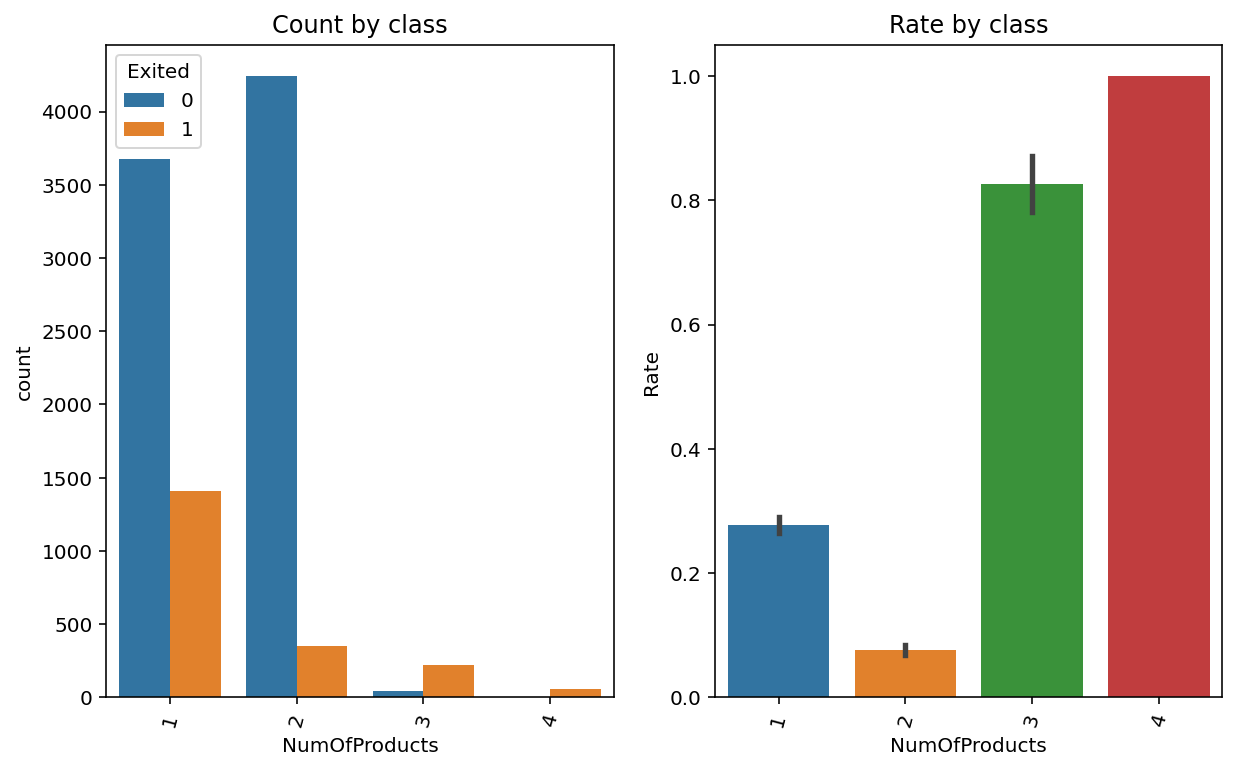

CreditScore        Age    Tenure       Balance              \
                     mean       mean      mean          mean      median   
NumOfProducts                                                              
1              649.120968  39.673092  4.974626  98551.870614  111886.035   
2              652.188671  37.753595  5.051852  51879.145813       0.000   
3              648.105263  43.195489  5.003759  75458.328195   95973.935   
4              653.583333  45.683333  5.300000  93733.135000  116808.195   

              EstimatedSalary    Exited  
                         mean      mean  
NumOfProducts                            
1                99487.256851  0.277144  
2               100452.012821  0.075817  
3               104318.130564  0.827068  
4               104763.723333  1.000000

In [33]:
stalk(df , "NumOfProducts" , "Exited" , num_cols)

* We have seen that the Number Of Product variable is effective for churning. It is especially remarkable that all 4 ones have churned.

* We analyzed categorical variables according to their Balance status.

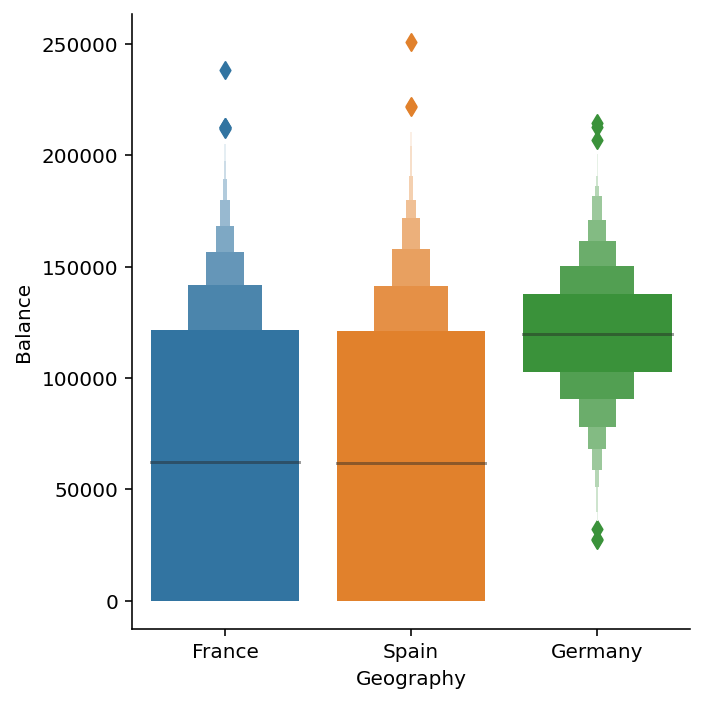

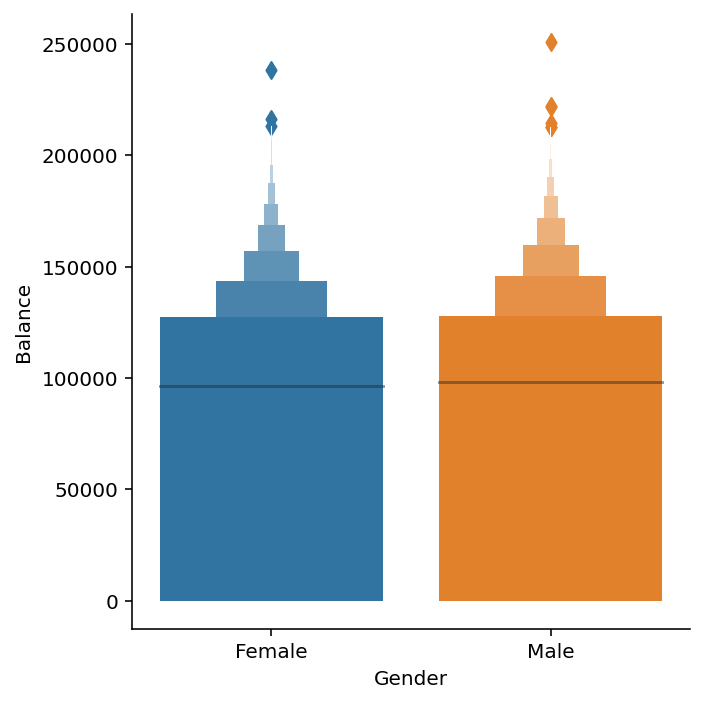

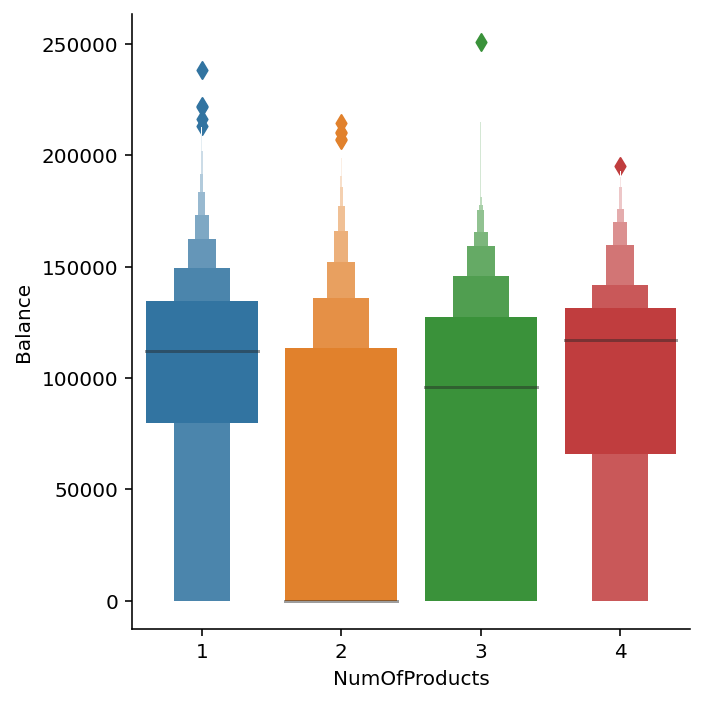

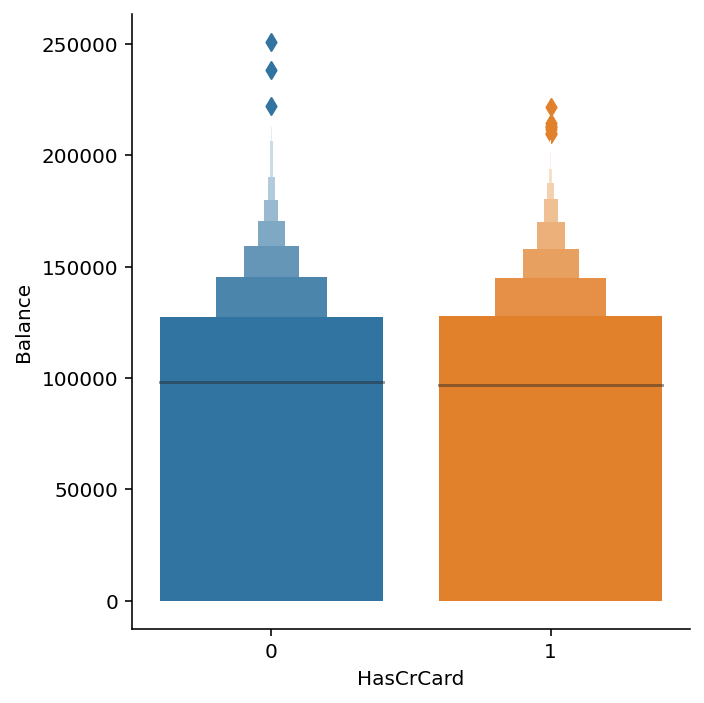

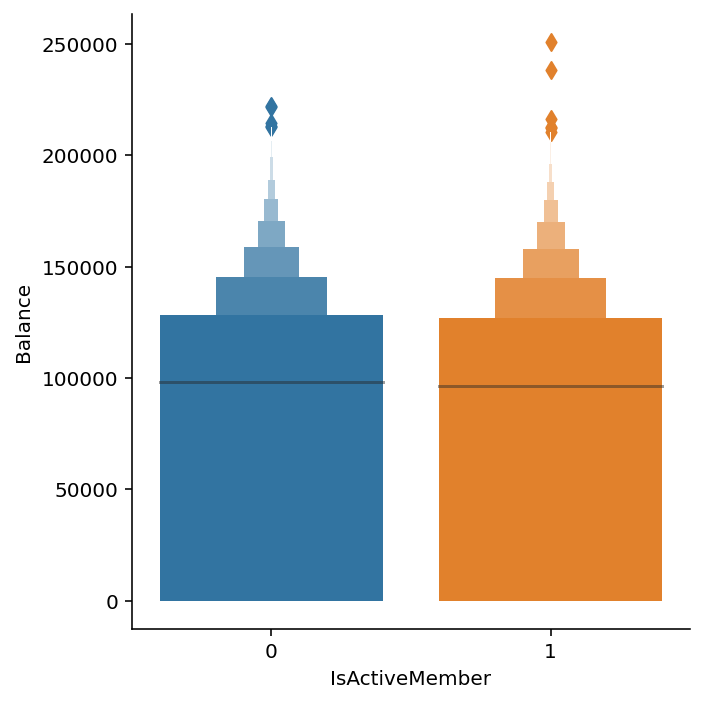

In [34]:
for col in cat_cols :
    sns.catplot(x=col, y="Balance", kind="boxen",
            data=df.sort_values("Balance"));

We analyzed categorical variables according to their Estimated Salary.

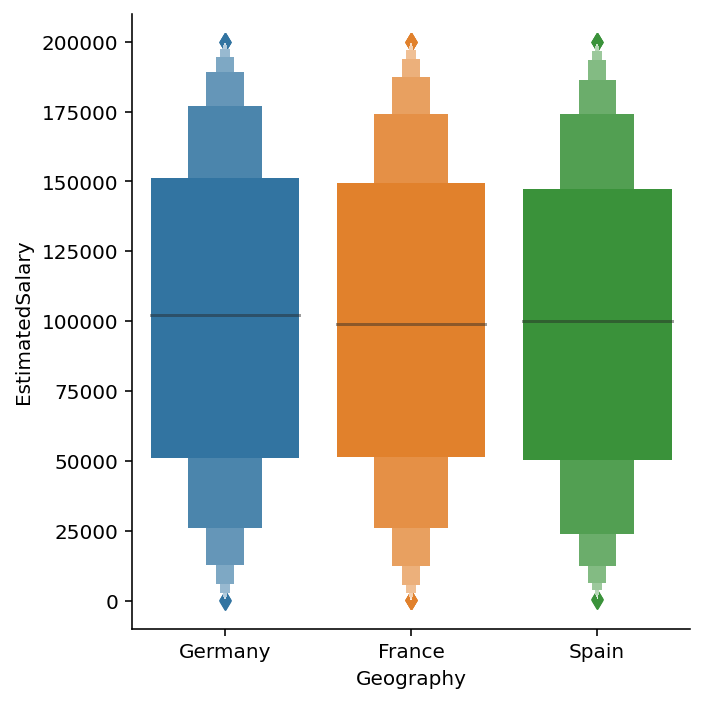

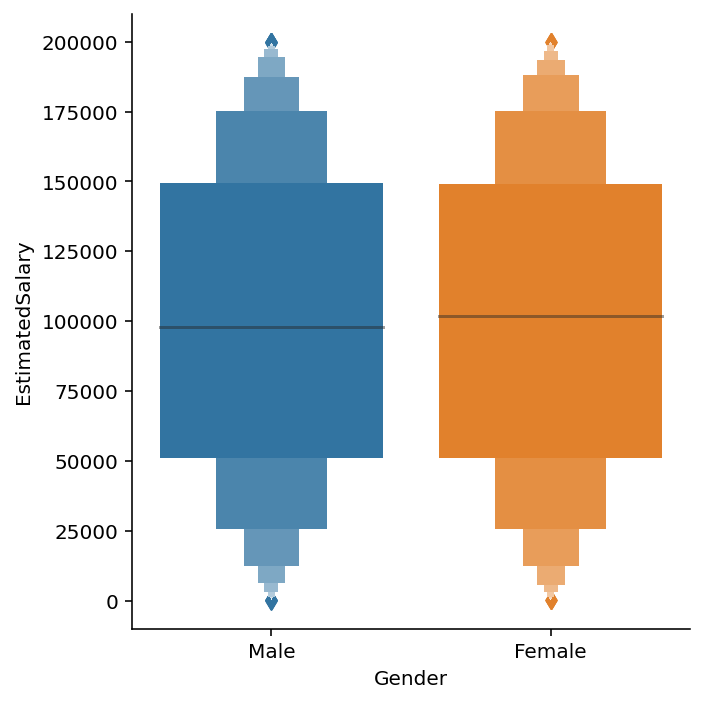

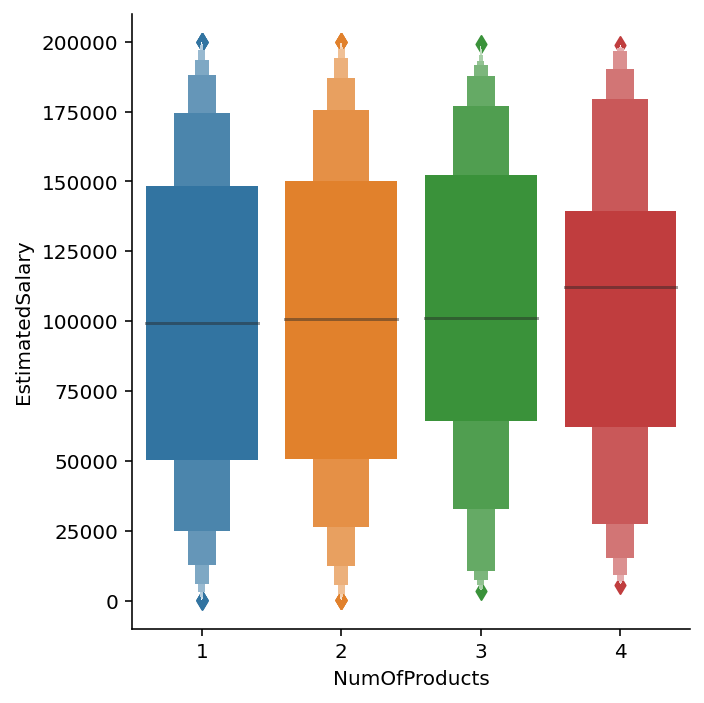

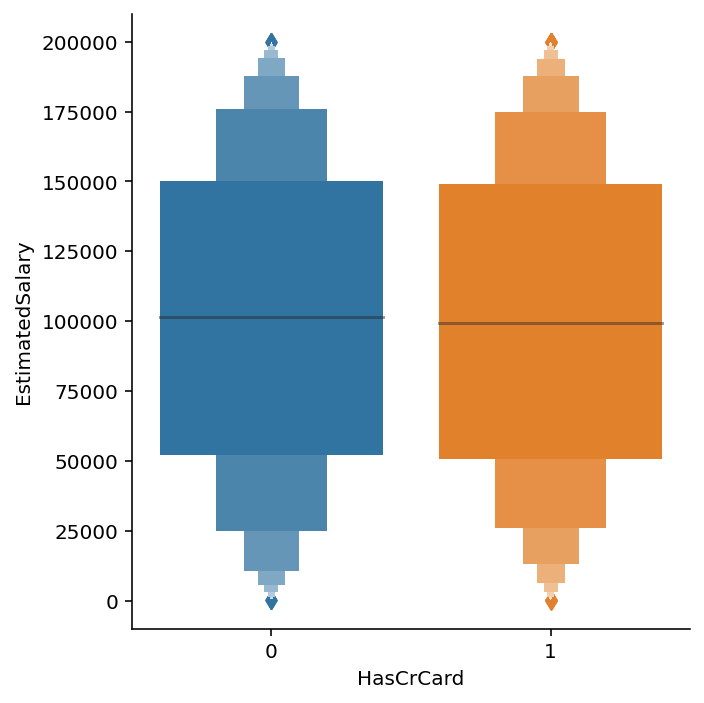

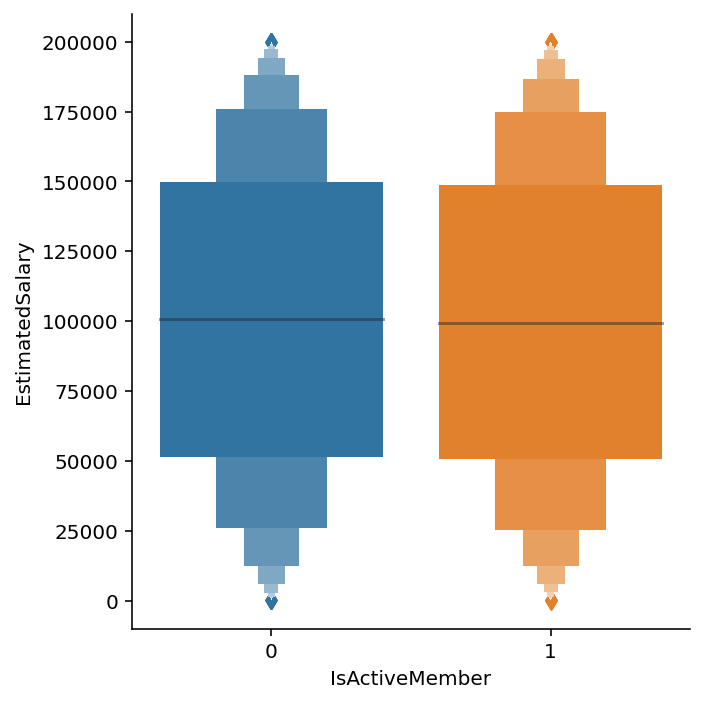

In [35]:
for col in cat_cols :
    sns.catplot(x=col, y="EstimatedSalary", kind="boxen",
            data=df.sort_values("EstimatedSalary"));

We analyzed categorical variables according to their age.

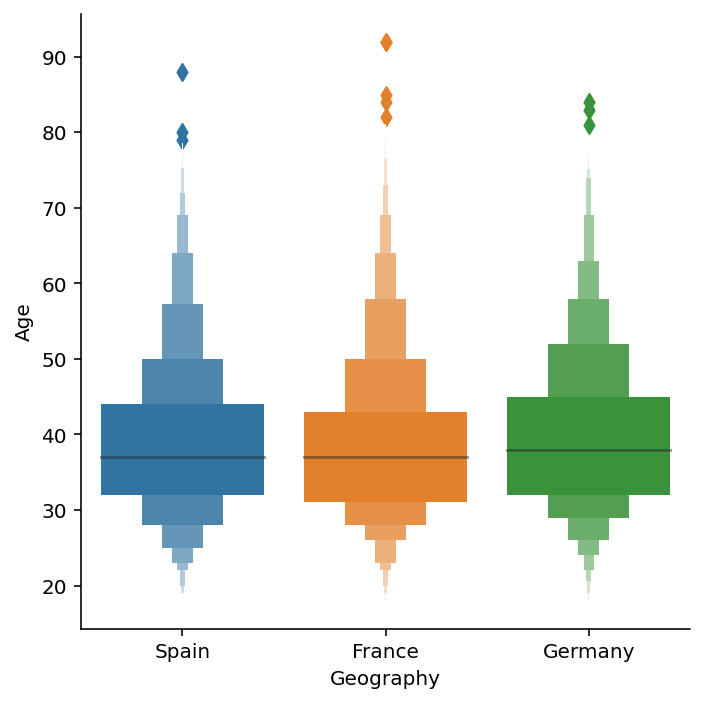

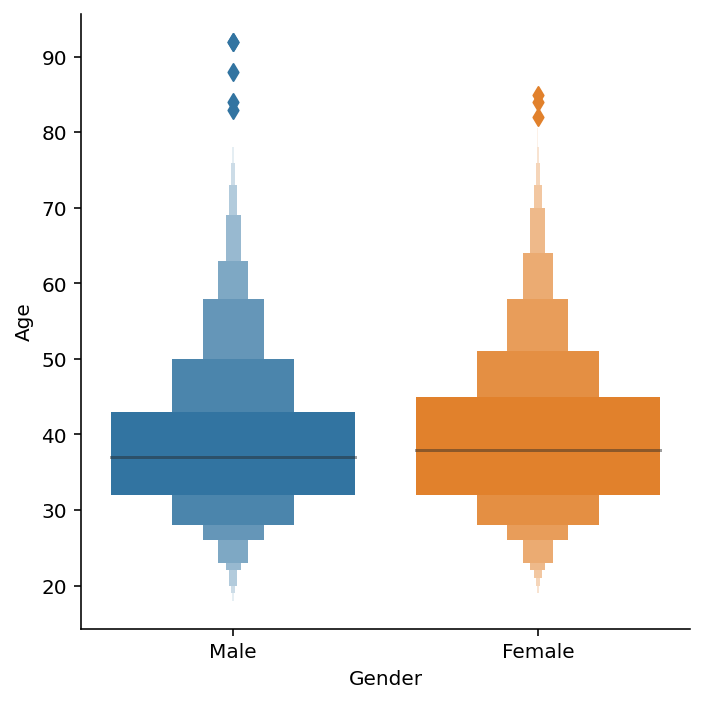

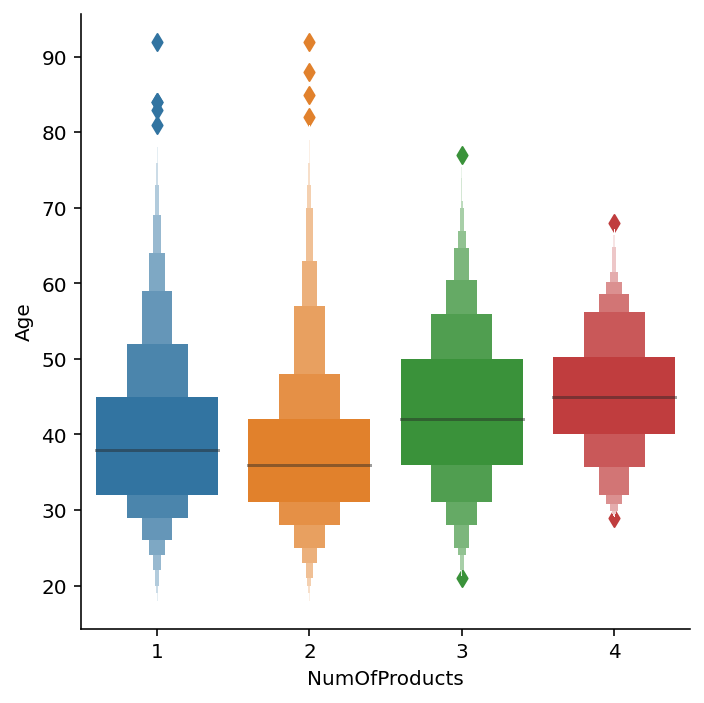

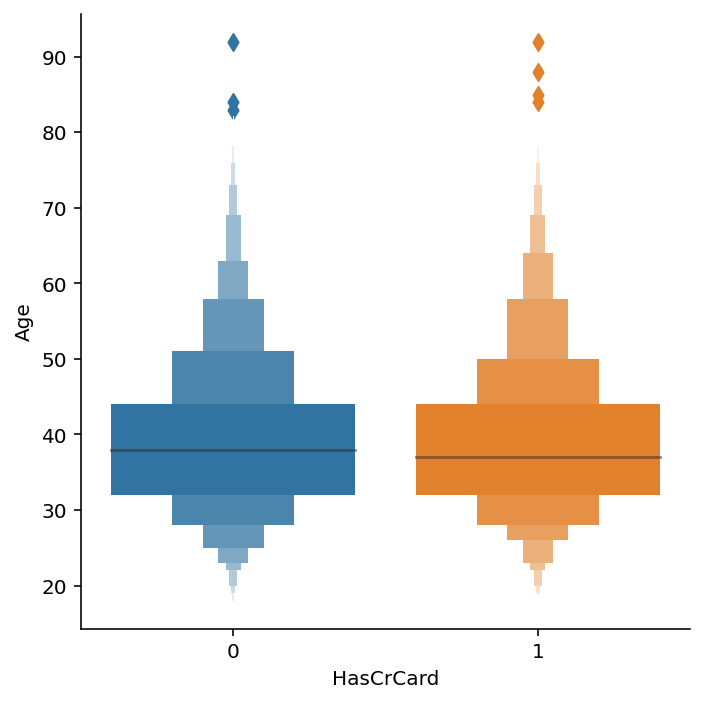

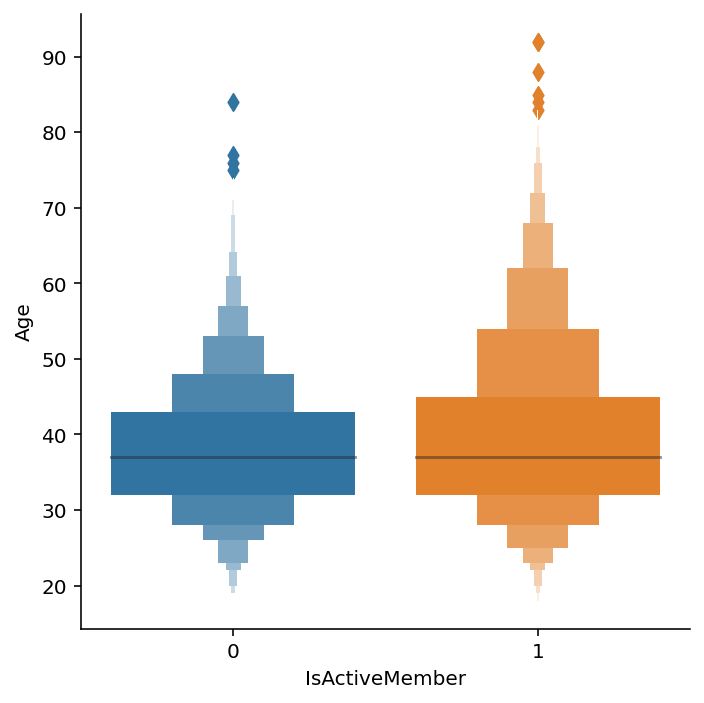

In [36]:
for col in cat_cols :
    sns.catplot(x=col, y="Age", kind="boxen",
            data=df.sort_values("Age"));

# Feature Engineering

In [37]:
df.loc[(df["Age"] > 0) & (df["Age"] <= 43),"Generation"] = 1
df.loc[(df["Age"] > 43) & (df["Age"] < 65),"Generation"] = 3
df.loc[(df["Age"] >= 65),"Generation"] = 2

* The age variable was classified according to their churn status.

In [38]:
df["EstimatedTenure"]=df["EstimatedSalary"]/(df["Tenure"]+1)

In [39]:
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

In [40]:
df["Balance/Age"]= df["Balance"] / df["Age"]

In [41]:
df["CreditScoretoTenure"]= df["CreditScore"] / (df["Tenure"]+1)

In [42]:
df["EstimatedSalary/Age"] = df["EstimatedSalary"] / df["Age"]

In [43]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [44]:
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns

In [45]:
df, new_cols_ohe = one_hot_encoder(df, cat_cols)

In [46]:
df["Tenure"].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

* While the minimum value of the Tenure variable is 0, there may be infinite values in the newly created variable, so I chose to add 1.

In [47]:
df["CreditScoretoTenure"].describe()

count    10000.000000
mean       157.590819
std        132.887173
min         31.818182
25%         76.375000
50%        108.585714
75%        186.000000
max        850.000000
Name: CreditScoretoTenure, dtype: float64

# # # Model

# #RandomForestClassifier

In [48]:
X = df.drop('Exited', axis=1)
y = df[["Exited"]]


In [49]:
rf_model = RandomForestClassifier(random_state=12345).fit(X, y)

cross_val_score(rf_model, X, y, cv=10).mean()



0.8623

# GBM

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

gbm_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)


cv_results = cross_val_score(gbm_model, X_train, y_train, cv = 10, scoring= "accuracy")

print(cv_results.mean())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8616249999999999
0.856
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1573
           1       0.80      0.44      0.56       427

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# # MODEL TUNING

* Since we have an imbalanced dataset, we will increase the number of samples by SMOTE technique

In [52]:
Smote = SMOTE(random_state=12345)
X_res, y_res = Smote.fit_sample(X, y)

# LGBM

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.0min finished


Auc Score :  0.8638999999999999


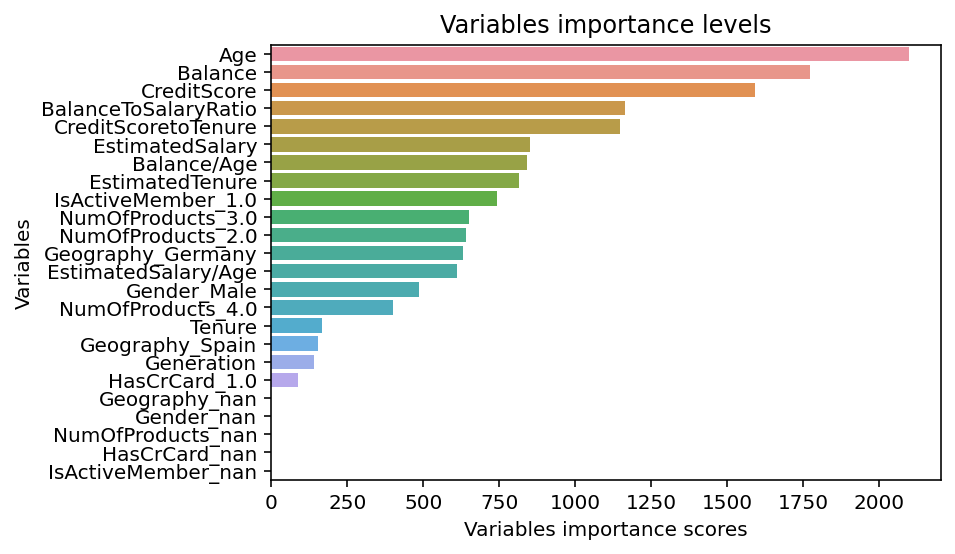

In [53]:
# LightGBM


lgbm = LGBMClassifier(random_state=12345)
cross_val_score(lgbm, X, y, cv=10).mean()

# model tuning
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5],
               "n_estimators": [500, 1000, 1500],
               "max_depth": [3, 5, 8]}

gs_cv = GridSearchCV(lgbm,
                     lgbm_params,
                     cv=5,
                     n_jobs=-1,
                     verbose=2).fit(X, y)

lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X, y)
auc=cross_val_score(lgbm_tuned, X, y, cv=10).mean()
print("Auc Score : " , auc)

feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables importance scores')
plt.ylabel('Variables')
plt.title("Variables importance levels")
plt.show()

In [54]:
LGBM = 0.86389999999999